In [1]:
import pickle
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_max_pool
from torch_geometric.data import Batch
from torch_geometric.loader import DataLoader
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = GCNConv(30, 256)
        self.conv2 = GCNConv(256, 256)
        self.conv3 = GCNConv(256, 256)
        self.conv4 = GCNConv(256, 256)
        self.fc1 = nn.Linear(256, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.conv3(x, edge_index)
        x = F.relu(x)
        x = self.conv4(x, edge_index)
        x = F.relu(x)
        x = global_max_pool(x, data.batch)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x

In [3]:
def custom_collate(batch):
    data_list, target_list = zip(*batch)
    batch_data = Batch.from_data_list(data_list)
    batch_target = torch.stack(target_list)
    return batch_data, batch_target

Dataset :  AI
Epoch 1, Validation Loss: 0.48832560479640963
Epoch 2, Validation Loss: 0.28759436706701913
Epoch 3, Validation Loss: 0.22529838979244232
Epoch 4, Validation Loss: 0.15687474682927133
Epoch 5, Validation Loss: 0.11943505654732386
Epoch 6, Validation Loss: 0.11091847444574038
Epoch 7, Validation Loss: 0.10917618448535601
Epoch 8, Validation Loss: 0.1192595380047957
Epoch 9, Validation Loss: 0.1174809363981088
Epoch 10, Validation Loss: 0.10757244154810905
Epoch 11, Validation Loss: 0.09644336774945259
Epoch 12, Validation Loss: 0.10197319115201632
Epoch 13, Validation Loss: 0.07476478517055511
Epoch 14, Validation Loss: 0.0789231825619936
Epoch 15, Validation Loss: 0.0677826834221681
Epoch 16, Validation Loss: 0.06858982356886069
Epoch 17, Validation Loss: 0.06428366291026275
Epoch 18, Validation Loss: 0.06295260625580947
Epoch 19, Validation Loss: 0.06071360819041729
Epoch 20, Validation Loss: 0.06161560888091723
Epoch 21, Validation Loss: 0.06025661105910937
Epoch 22, Va

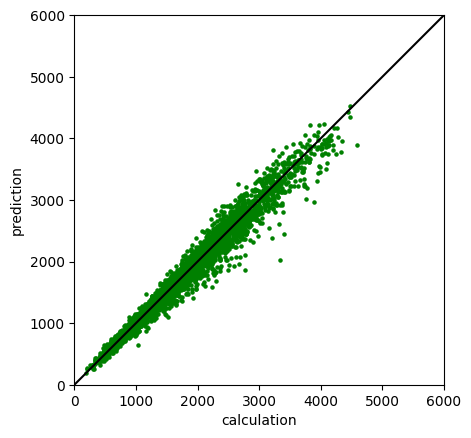

Dataset :  AI2
Epoch 1, Validation Loss: 0.37579624851544696
Epoch 2, Validation Loss: 0.28523585249980293
Epoch 3, Validation Loss: 0.31665455748637517
Epoch 4, Validation Loss: 0.16266445989410083
Epoch 5, Validation Loss: 0.19280397643645605
Epoch 6, Validation Loss: 0.15657210598389307
Epoch 7, Validation Loss: 0.13599645470579466
Epoch 8, Validation Loss: 0.12044201592604319
Epoch 9, Validation Loss: 0.11295508245627085
Epoch 10, Validation Loss: 0.09839636844893297
Epoch 11, Validation Loss: 0.11035166059931119
Epoch 12, Validation Loss: 0.09693396476407846
Epoch 13, Validation Loss: 0.0948220190902551
Epoch 14, Validation Loss: 0.09331606899698576
Epoch 15, Validation Loss: 0.08442496148248514
Epoch 16, Validation Loss: 0.08804208673536777
Epoch 17, Validation Loss: 0.09654846079647542
Epoch 18, Validation Loss: 0.09083273721237978
Epoch 19, Validation Loss: 0.09042094896237056
Epoch 20, Validation Loss: 0.07599254374702771
Epoch 21, Validation Loss: 0.08142857017616431
Epoch 22

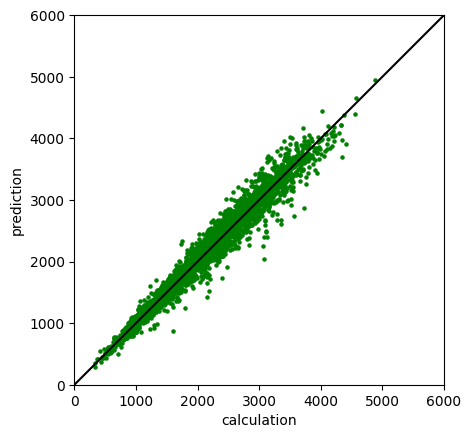

Dataset :  Random
Epoch 1, Validation Loss: 0.36962574571371076
Epoch 2, Validation Loss: 0.23926276316245396
Epoch 3, Validation Loss: 0.20883635232845943
Epoch 4, Validation Loss: 0.14596192290385565
Epoch 5, Validation Loss: 0.11639373103777567
Epoch 6, Validation Loss: 0.10174363913635413
Epoch 7, Validation Loss: 0.09371771812438964
Epoch 8, Validation Loss: 0.10383705918987592
Epoch 9, Validation Loss: 0.09429514259099961
Epoch 10, Validation Loss: 0.0777557539443175
Epoch 11, Validation Loss: 0.08535788357257842
Epoch 12, Validation Loss: 0.07043975840012233
Epoch 13, Validation Loss: 0.06955246652166049
Epoch 14, Validation Loss: 0.06612732385595639
Epoch 15, Validation Loss: 0.06498584834237893
Epoch 16, Validation Loss: 0.060547013332446414
Epoch 17, Validation Loss: 0.06531883788605532
Epoch 18, Validation Loss: 0.06834091252336899
Epoch 19, Validation Loss: 0.06534952223300934
Epoch 20, Validation Loss: 0.05871131358047326
Epoch 21, Validation Loss: 0.05592205574115117
Epoc

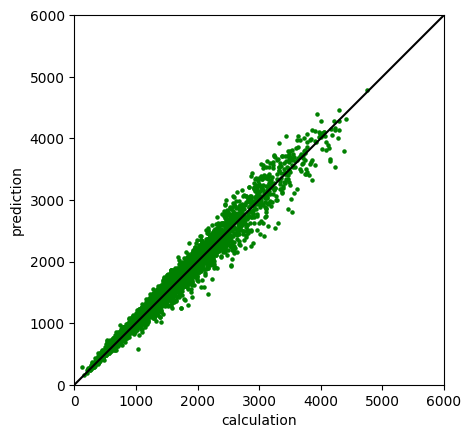

Dataset :  Human
Epoch 1, Validation Loss: 0.5305299570163091
Epoch 2, Validation Loss: 0.5231179992357889
Epoch 3, Validation Loss: 0.21230224072933196
Epoch 4, Validation Loss: 0.31801380862792333
Epoch 5, Validation Loss: 0.09578563794493675
Epoch 6, Validation Loss: 0.06679128408432007
Epoch 7, Validation Loss: 0.09639079831540584
Epoch 8, Validation Loss: 0.06910985447466374
Epoch 9, Validation Loss: 0.06308369922141234
Epoch 10, Validation Loss: 0.03508383588244517
Epoch 11, Validation Loss: 0.029517015131811302
Epoch 12, Validation Loss: 0.024071568499008815
Epoch 13, Validation Loss: 0.025033236046632133
Epoch 14, Validation Loss: 0.017853213318934042
Epoch 15, Validation Loss: 0.016605678231765827
Epoch 16, Validation Loss: 0.01582144626105825
Epoch 17, Validation Loss: 0.01498142359778285
Epoch 18, Validation Loss: 0.01474177964652578
Epoch 19, Validation Loss: 0.012072674604132772
Epoch 20, Validation Loss: 0.01205877042375505
Epoch 21, Validation Loss: 0.02912440268943707
E

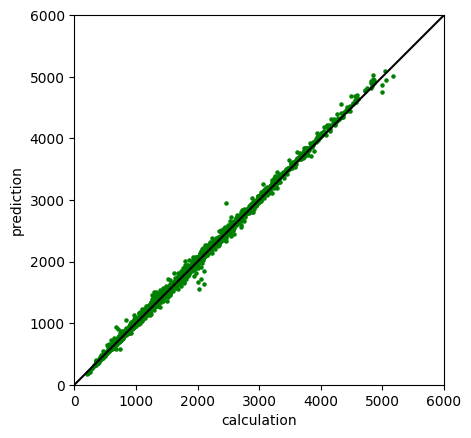

In [4]:
torch.manual_seed(0)

target_data = "bertzct"
scaler = StandardScaler()
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('cpu')
    
for d in ["AI", "AI2", "Random", "Human"]:
    torch.manual_seed(0)
    print('Dataset : ', d)
    dataset = d

    with open(f'data_{dataset}/data_train_list.pkl', 'rb') as f:
        data_train_list = pickle.load(f)
    with open(f'data_{dataset}/data_val_list.pkl', 'rb') as f:
        data_val_list = pickle.load(f)
    with open(f'data_{dataset}/data_test_list.pkl', 'rb') as f:
        data_test_list = pickle.load(f)
    with open(f'data_{dataset}/target_train_{target_data}.pkl', 'rb') as f:
        target_train = pickle.load(f)
    with open(f'data_{dataset}/target_val_{target_data}.pkl', 'rb') as f:
        target_val = pickle.load(f)
    with open(f'data_{dataset}/target_test_{target_data}.pkl', 'rb') as f:
        target_test = pickle.load(f)
        
    target_train = scaler.fit_transform(np.array(target_train).reshape(-1, 1)).flatten()
    target_val = scaler.transform(np.array(target_val).reshape(-1, 1)).flatten()
    target_test = scaler.transform(np.array(target_test).reshape(-1, 1)).flatten()
    target_train = torch.tensor(target_train, dtype=torch.float32)
    target_val = torch.tensor(target_val, dtype=torch.float32)
    target_test = torch.tensor(target_test, dtype=torch.float32)

    train_loader = DataLoader(list(zip(data_train_list, target_train)), batch_size=128, collate_fn=custom_collate)
    val_loader = DataLoader(list(zip(data_val_list, target_val)), batch_size=128, collate_fn=custom_collate)
    test_loader = DataLoader(list(zip(data_test_list, target_test)), batch_size=128, collate_fn=custom_collate)

    model = Net().to(device)

    model.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
    criterion = nn.MSELoss()

    early_stopping_patience = 30
    best_val_loss = float('inf')
    patience_counter = 0

    loss_train = []
    for epoch in range(100):
        model.train()
        for data, target in train_loader:
            data = data.to(device)
            target = target.to(device)
            out = model(data)
            loss = criterion(out, target.view(-1, 1))
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_train.append(loss.item())
        
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for data, target in val_loader:
                data = data.to(device)
                target = target.to(device)
                out = model(data)
                loss = criterion(out, target.view(-1, 1))
                val_loss += loss.item()
        val_loss /= len(val_loader)
        print(f'Epoch {epoch+1}, Validation Loss: {val_loss}')
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            torch.save(model.state_dict(), f'data_{dataset}/model_{dataset}_sc.pth')
        else:
            patience_counter += 1
        if patience_counter >= early_stopping_patience:
            print(f'Early stopping triggered at epoch {epoch+1}')
            break
    
    model.load_state_dict(torch.load(f'data_{dataset}/model_{dataset}_sc.pth'))
    model.eval()
    
    pred_train = []
    for data, target in train_loader:
        data = data.to(device)
        with torch.no_grad():
            out = model(data)
        pred_train.append(out.cpu().numpy())
    pred_train = np.concatenate(pred_train)

    pred_test = []
    for data, target in test_loader:
        data = data.to(device)
        with torch.no_grad():
            out = model(data)
        pred_test.append(out.cpu().numpy())
    pred_test = np.concatenate(pred_test)

    pred_train = scaler.inverse_transform(pred_train)
    pred_test = scaler.inverse_transform(pred_test)
    target_train = scaler.inverse_transform(np.array(target_train).reshape(-1, 1)).flatten()
    target_test = scaler.inverse_transform(np.array(target_test).reshape(-1, 1)).flatten()

    print('R2 train:', metrics.r2_score(target_train, pred_train))
    print('R2 test:', metrics.r2_score(target_test, pred_test))
    
    n = 6000
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(range(0, n+1), range(0, n+1), c='black')
    plt.scatter(target_test, pred_test, c='green', s=5)
    plt.xlim(0, n)
    plt.ylim(0, n)
    ax.set_aspect('equal', adjustable='box')
    plt.xlabel("calculation")
    plt.ylabel("prediction")
    plt.show()
    fig.savefig(f'data_{dataset}/source_sc.pdf')
    print('======================================================')